In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from sklearn.externals import joblib

#### DATADIR to DI PA to train model

In [2]:
DATADIR = "/home/apofeo/Documents/clp_rotated_v3/train"

#### DATADIR to DI PA to evaluate model

In [42]:
DATADIR = "im_base_to_angle/DI_PA_Test/test"

#### DATADIR to CI PA to evaluate model

In [3]:
DATADIR = "im_base_to_angle/rotated_5_pa/test"

#### DATADIR to CI NA to evaluate model

In [24]:
DATADIR = "im_base_to_angle/rotated_4_na/test"

In [3]:
CATEGORIES_INT = [i for i in range(1, 361)]
CATEGORIES = [str(item) for item in CATEGORIES_INT]
# map(str, CATEGORIES)
# print(CATEGORIES)

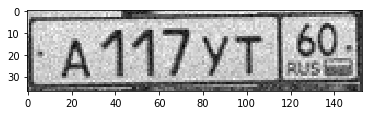

In [4]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [5]:
print(img_array)

[[184 190 189 ...  65  44  61]
 [189 190 208 ... 107 107  38]
 [201 179 181 ...  33  55  36]
 ...
 [114  65  60 ...  59 106  64]
 [ 55 142  90 ...  76 104  63]
 [ 69 112  69 ...  45 110  63]]


In [7]:
print(img_array.shape)

(200, 200)


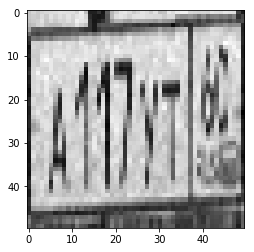

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

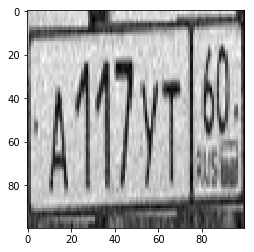

In [8]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
training_data = []

In [10]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

In [11]:
create_training_data()

100%|██████████| 150/150 [00:01<00:00, 106.56it/s]


In [12]:
print(len(training_data))

54000


In [13]:
import random

In [14]:
random.shuffle(training_data)

In [15]:
for sample in training_data[:10]:
    print(sample[1])

117
33
86
262
144
39
3
72
289
70


In [16]:
X = []
Y = []

In [17]:
for features,label in training_data[:20000]:
    X.append(features)
    Y.append(label)

In [14]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

IndexError: list index out of range

In [19]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [18]:
print(type(X))
print(X[0])

<class 'list'>
[[[ 59  43  33]
  [ 57  47  44]
  [ 28  27  25]
  ...
  [ 70  79  84]
  [ 43  54  58]
  [ 78  88  94]]

 [[147  81  42]
  [140  80  44]
  [115  64  35]
  ...
  [ 69  78  83]
  [ 61  71  76]
  [ 89  99 104]]

 [[151  79  38]
  [144  72  29]
  [146  74  31]
  ...
  [ 82  91  94]
  [ 54  61  67]
  [ 75  84  88]]

 ...

 [[ 80 108 125]
  [ 69  97 115]
  [ 75 103 121]
  ...
  [ 34  35  39]
  [ 28  29  32]
  [ 37  39  40]]

 [[ 84 109 126]
  [100 124 141]
  [ 75 100 118]
  ...
  [ 32  33  36]
  [ 44  45  48]
  [ 35  36  37]]

 [[ 93 117 133]
  [107 130 146]
  [ 95 117 133]
  ...
  [ 33  34  35]
  [ 47  49  50]
  [ 23  25  25]]]


In [59]:
# import pickle

In [19]:
# pickle_out = open("trained_data/X_to_E_DI_PA.pickle","wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

filename = 'trained_data/X_CLP_CI_PA_3CH_v3.sav'
joblib.dump(X, filename)

['trained_data/X_CLP_CI_PA_3CH_v3.sav']

In [20]:
# pickle_out = open("trained_data/y_to_E_DI_PA.pickle","wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

filename = 'trained_data/Y_CLP_CI_PA_3CH_v3.sav'
joblib.dump(Y, filename)

['trained_data/Y_CLP_CI_PA_3CH_v3.sav']